# Módulo 2
## Implementación de una técnica de aprendizaje máquina sin el uso de un framework

Entregable: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1. Crea un repositorio de GitHub para este proyecto. $\checkmark$
2. Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.  $\checkmark$
3. Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos. $\checkmark$
4. Tu implementación debe de poder correr por separado solamente con un compilador, no debe de depender de un IDE o de un “notebook”. Por ejemplo, si programas en Python, tu implementación final se espera que esté en un archivo .py no en un Jupyter Notebook.
5. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

---

### Modelo elegido: Regresión logística

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

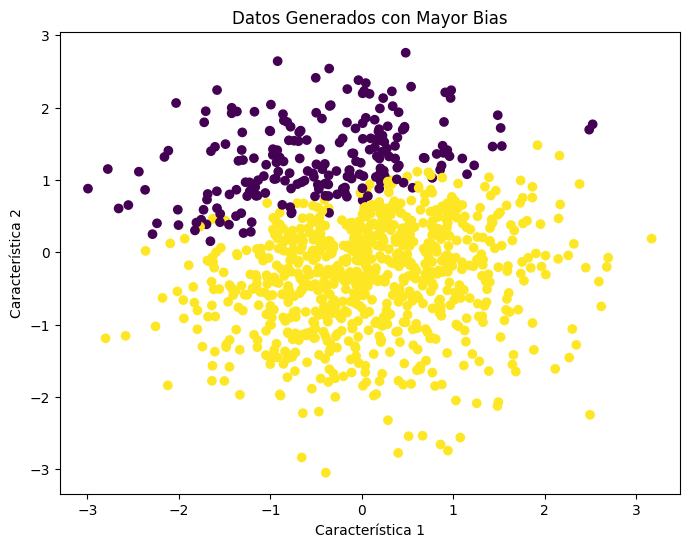

In [2]:
def generar_datos_con_sesgo(num_samples, bias=True, bias_strength=-2):
    np.random.seed(0)  # Para reproducibilidad
    
    # Generar características aleatorias
    X = np.random.randn(num_samples, 2)
    
    # Definir los pesos verdaderos (coeficientes) para las características
    true_theta = np.array([1, -3])
    
    # Agregar un término de bias más fuerte en la combinación lineal
    linear_combination = X @ true_theta + bias_strength + 0.5 * np.random.randn(num_samples)
    
    # Aplicar la función sigmoide para crear probabilidades
    probabilities = 1 / (1 + np.exp(-linear_combination))
    
    # Convertir probabilidades en etiquetas (0 o 1) usando un umbral
    y = (probabilities >= 0.5).astype(int)
    
    # Agregar el término de sesgo (bias) si es necesario
    if bias:
        X = np.c_[np.ones((num_samples, 1)), X]
    
    return X, y

# Generar un conjunto de datos de ejemplo con más bias
num_samples = 1000
X, y = generar_datos_con_sesgo(num_samples, bias_strength=2.5)

# Mostrar una gráfica de los datos generados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis')
plt.title('Datos Generados con Mayor Bias')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


# Implementación de la regresión logística

In [3]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = (1/m)*(((-y).T.dot(np.log(h + epsilon))) - ((1-y).T.dot(np.log(1-h + epsilon))))
    grad = (1/m)*(X.T.dot(h-y))
    return cost, grad

# Función de gradiente descendente
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    for i in range(iters):
        h = sigmoid(X.dot(theta))
        gradient = (1/m)*(X.T.dot(h-y))
        theta -= alpha*gradient
        if i % 1000 == 0:
            cost, _ = cost_function(X, y, theta)
            print(f"Cost at iteration {i}", cost)
    return theta

# Función de predicción
def predict(X, theta, threshold=0.5):
    return sigmoid(X.dot(theta)) >= threshold

---
# Prueba de la implementación

Costo inicial: 0.6931271807599431
Cost at iteration 0 0.676501683131193
Cost at iteration 1000 0.11241215197102773
Cost at iteration 2000 0.09265041351579666
Cost at iteration 3000 0.08419546722030048
Cost at iteration 4000 0.07933219486475625
Cost at iteration 5000 0.07613071471390825
Cost at iteration 6000 0.07385099635820566
Cost at iteration 7000 0.0721415274077854
Cost at iteration 8000 0.07081173636446256
Cost at iteration 9000 0.06974849706352881
Costo final: 0.06888083552786227
Precisión: 0.966
Pesos finales:
[ 6.54288284  2.50291696 -7.97688046]


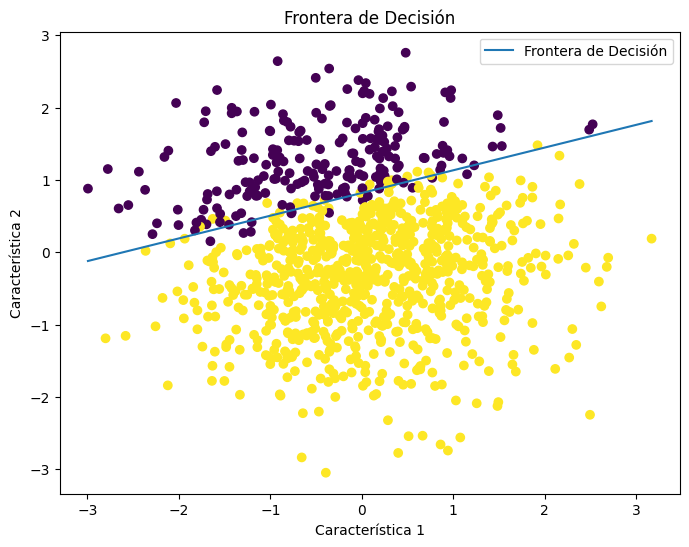

In [4]:
# Inicializar los pesos (coeficientes)
theta = np.zeros(X.shape[1])

# Definir la tasa de aprendizaje y el número de iteraciones
alpha = 0.1
iters = 10000

# Calcular el costo inicial
initial_cost, _ = cost_function(X, y, theta)
print(f'Costo inicial: {initial_cost}')

# Ejecutar el algoritmo de gradiente descendente
theta = gradient_descent(X, y, theta, alpha, iters)

# Calcular el costo final
final_cost, _ = cost_function(X, y, theta)

print(f'Costo final: {final_cost}')

# Realizar predicciones
y_pred = predict(X, theta)

# Calcular la precisión
accuracy = (y_pred == y).mean()

print(f'Precisión: {accuracy}')

# Mostrar los pesos finales
print('Pesos finales:')
print(theta)

# Mostrar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis')
plt.title('Frontera de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.legend()
plt.show()